# Este projeto tem como objetivo verificar o comportamento da variável "Tolerância e Inclusão" dos anos de 2016, 2018 e 2020 e sua correlação com outras variáveis presentes nos dados da pesquisa IPS - RJ

## Para mais informações

## Fonte dos dados e links relacionados:

## https://basedosdados.org/dataset/br-rj-rio-de-janeiro-ipp-ips

## http://ipsrio.com.br/#aspects%5B%5D=1&aspects%5B%5D=19&aspects%5B%5D=35&aspects%5B%5D=2&map-type=performance&active-cat=1&page=1&tab=map

## https://www.data.rio/apps/PCRJ::ips-rio-indice-de-progresso-social-da-cidade-do-rio-de-janeiro/explore



In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import folium as fl

In [4]:
df_ips_rj = pd.read_csv("dimensoes_componentes.csv")

In [5]:
df_ips_rj.head(5)

,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
0,2016,Rio De Janeiro,60.77,75.84,70.19,83.68,78.16,71.34,53.28,49.96,50.89,62.03,50.26,53.20,61.46,54.82,64.14,32.36
1,2016,Portuaria,45.33,59.10,87.63,80.80,67.97,0.00,41.67,41.34,20.73,64.74,39.89,35.23,39.35,61.94,34.18,5.43
2,2016,Centro,57.75,62.43,59.38,74.18,91.85,24.31,52.41,55.60,56.00,41.04,56.99,58.42,45.89,87.27,52.24,48.26
3,2016,Rio Comprido,52.43,58.97,61.22,84.36,64.78,25.52,47.19,34.00,42.08,47.84,64.84,51.14,66.89,50.45,64.74,22.48
4,2016,Botafogo,87.12,93.32,85.15,98.49,99.55,90.08,81.13,78.47,86.52,81.46,78.07,86.91,68.19,85.74,94.30,99.39


# 1 Filtragem de ano e região administrativa

In [6]:
df_ips_rj.ano.unique()

array([2016, 2018, 2020], dtype=int64)

In [7]:
df_ips_rj.regiao_administrativa.unique()

array(['Rio De Janeiro', 'Portuaria', 'Centro', 'Rio Comprido',
       'Botafogo', 'Copacabana', 'Lagoa', 'São Cristovão', 'Tijuca',
       'Vila Isabel', 'Ramos', 'Penha', 'Inhaúma', 'Méier', 'Iraja',
       'Madureira', 'Jacarepaguá', 'Bangu', 'Campo Grande', 'Santa Cruz',
       'Ilha Do Governador', 'Anchieta', 'Santa Teresa',
       'Barra Da Tijuca', 'Pavuna', 'Guaratiba', 'Rocinha', 'Jacarezinho',
       'Complexo Do Alemão', 'Maré', 'Vigário Geral', 'Realengo',
       'Cidade De Deus'], dtype=object)

# 2 Análise exploratória da variável "Tolerância e Inclusão"

## 2.1 Montando a tabela com dados do ano de 2020

**Realizando a filtragem de dados referentes ao ano de 2020:**

In [8]:
ano2020 = df_ips_rj.query("ano==2020")

In [9]:
ano2020.head()

,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
66,2020,Rio De Janeiro,60.79,74.13,66.12,83.68,79.57,67.14,51.63,66.19,50.89,53.08,36.37,56.62,54.33,62.72,77.05,32.36
67,2020,Portuaria,42.06,59.67,64.32,80.80,71.06,22.49,36.00,59.51,20.73,19.20,44.55,30.52,25.66,50.76,40.23,5.43
68,2020,Centro,55.59,59.23,56.64,74.18,91.60,14.52,50.26,61.97,56.00,37.26,45.82,57.26,41.68,87.28,51.84,48.26
69,2020,Rio Comprido,55.50,68.27,72.61,84.36,73.29,42.82,50.81,68.72,42.08,39.33,53.10,47.42,37.76,60.82,68.64,22.48
70,2020,Botafogo,85.03,91.66,89.92,98.49,99.07,79.18,77.09,80.70,86.52,78.58,62.56,86.32,56.63,89.80,99.48,99.39


O conjunto de dados possui entradas respectivas aos anos de 2016, 2018 e 2020 e por conta disso as regiões administrativas **(regiao_administrativa)** acabam se repetindo dentro do conjunto de dados. Para facilitar o trabalho será criado um DataFrame para cada ano. Primeiramente, será explorado as entradas do ano de 2020, sendo a variável Tolerância e Inclusão **(tolerancia_inclusao)**, objeto principal da análise exploratória.

In [10]:
df_ips_2020 = pd.DataFrame(ano2020[["regiao_administrativa", "tolerancia_inclusao"]])
df_ips_2020.head()

,regiao_administrativa,tolerancia_inclusao
66,Rio De Janeiro,77.05
67,Portuaria,40.23
68,Centro,51.84
69,Rio Comprido,68.64
70,Botafogo,99.48


As variáveis "regiao_administrativa" e "tolerancia_inclusao" foram extraídas do Dataset.

In [11]:
df_ips_2020 = df_ips_2020.rename(columns={"regiao_administrativa": "Região", "tolerancia_inclusao" : "Tolerância e inclusão"})


In [12]:
df_ips_2020.head()

,Região,Tolerância e inclusão
66,Rio De Janeiro,77.05
67,Portuaria,40.23
68,Centro,51.84
69,Rio Comprido,68.64
70,Botafogo,99.48


As variáveis "regiao_administrativa" e "tolerancia_inclusao" foram renomeadas para atender o padrão de linguagem normal.

In [13]:
df_ips_2020 = df_ips_2020.reset_index(drop = True)

df_ips_2020.head()

,Região,Tolerância e inclusão
0,Rio De Janeiro,77.05
1,Portuaria,40.23
2,Centro,51.84
3,Rio Comprido,68.64
4,Botafogo,99.48


In [14]:
df_ips_2020 = df_ips_2020.drop(0)
df_ips_2020.head()

,Região,Tolerância e inclusão
1,Portuaria,40.23
2,Centro,51.84
3,Rio Comprido,68.64
4,Botafogo,99.48
5,Copacabana,98.53


A média geral da cidade do Rio de Janeiro foi deletada da tabela pois a análise exploratória será realizada apenas com as regiões administrativas. Logo, sem a pontuação geral da cidade o indíce da tabela será reiniciado na linha seguinte apenas com a pontuação das regiões administrativas.

In [15]:
df_ips_2020 = df_ips_2020.reset_index(drop = True)
df_ips_2020

,Região,Tolerância e inclusão
0,Portuaria,40.23
1,Centro,51.84
2,Rio Comprido,68.64
3,Botafogo,99.48
4,Copacabana,98.53
5,Lagoa,98.57
6,São Cristovão,62.40
7,Tijuca,95.88
8,Vila Isabel,92.14
9,Ramos,76.76


A tabela está montada mas não há critério de ordenamento (percebe-se que bairros com pontuações menores estão acima e vice-versa). No entanto, é possível começar a analisar a variável e entender como ela se distribui. O "rankeamento" da tabela será deixado para o final.

# 3 Verificando o comportamento da variável

In [16]:
df_ips_2020.describe()

,Tolerância e inclusão
count,32.000000
mean,73.653125
std,14.621055
min,40.230000
25%,67.160000
50%,71.160000
75%,83.020000
max,99.480000


Existem 32 entradas de dados, a média aritmética é 73.65, a mediana é 71.16, o desvio padrão é 14.64 , a pontuação mais baixa é de 40.23 e a pontuação mais alta é de 99.48.

In [17]:
df_ips_2020.loc[0]


Região                   Portuaria
Tolerância e inclusão        40.23
Name: 0, dtype: object

In [18]:
df_ips_2020.loc[3]

Região                   Botafogo
Tolerância e inclusão       99.48
Name: 3, dtype: object

Analisando a tabela é possível notar que a pontuação mais baixa corresponde a região Portuária e a mais alta a região de Botafogo.


**R.A. PORTUÁRIA - Área de abrangência: Caju, Gamboa, Saúde, Santo Cristo**

**R.A. BOTAFOGO – Área de abrangência: Botafogo, Catete, Cosme Velho, Flamengo, Glória, Humaitá, Laranjeiras, Urca**


In [55]:
m = fl.Map(location=[-22.9035, -43.2096], zoom_start=11.1)

fl.CircleMarker(
    location=[-22.9005866, -43.210285],
    radius=50,
    popup="R.A. PORTUÁRIA: Caju, Gamboa, Saúde, Santo Cristo. Pontuação: 40.23",
    color='blue',
).add_to(m)

fl.CircleMarker(
    location=[-22.9349702, -43.1873216],
    radius=50,
    popup='R.A. BOTAFOGO: Botafogo, Catete, Cosme Velho, Flamengo, Glória, Humaitá, Laranjeiras, Urca. Pontuação: 99.48',
    color='red',

).add_to(m)

In [56]:
m

No mapa acima é possível verificar a relativamente a localização das regiões Portuária e de Botafogo e ao clicarmos na borda do círculo, informações são mostradas. O mapa servirá como apoio na análise

In [21]:
df_ips_2020.head()

,Região,Tolerância e inclusão
0,Portuaria,40.23
1,Centro,51.84
2,Rio Comprido,68.64
3,Botafogo,99.48
4,Copacabana,98.53


In [22]:
n = df_ips_2020.shape[0]
n

32

É possível perceber que temos 32 entradas de dados, uma média aritmética de 73.65, uma mediana de 71.16. Desvio padrão de 14.64.
A pontuação mais baixa é de 40.23 e a mais alta de 99.48

In [23]:
k = 1 + (10/3) * np.log10(n)

In [24]:
k = int(k.round(0))
k

6

In [25]:
frequencia_ = pd.value_counts(pd.cut(x = df_ips_2020["Tolerância e inclusão"], bins = 6, include_lowest = True), 
            sort = False
               )

print(frequencia_)
print("A soma é", frequencia_.sum())


(40.17, 50.105]     2
(50.105, 59.98]     2
(59.98, 69.855]     8
(69.855, 79.73]    10
(79.73, 89.605]     5
(89.605, 99.48]     5
Name: Tolerância e inclusão, dtype: int64
A soma é 32


In [26]:
percentual_ = pd.value_counts(pd.cut(x = df_ips_2020["Tolerância e inclusão"], bins = 6, include_lowest = True), 
            sort = False, normalize = True
               )*100

print(percentual_)
print("A soma é", percentual_.sum())



(40.17, 50.105]     6.250
(50.105, 59.98]     6.250
(59.98, 69.855]    25.000
(69.855, 79.73]    31.250
(79.73, 89.605]    15.625
(89.605, 99.48]    15.625
Name: Tolerância e inclusão, dtype: float64
A soma é 100.0


# 2.1.2 Classificando os dados e montando a tabela de frequências

In [27]:
intervalo_2020 = [40.17, 50.10, 59.98, 69.85, 79.73, 89.60, 99.48]
classificacao_2020 = ["Ruim", "Mediano", "Bom", "Muito bom", "Ótimo", "Excelente"]

In [28]:

freq_2020 = pd.value_counts(pd.cut(x = df_ips_2020["Tolerância e inclusão"], 
            bins = intervalo_2020, labels = classificacao_2020, include_lowest = True), ascending = True)

print(freq_2020)
print("A soma é", freq_2020.sum())

Ruim          2
Mediano       2
Ótimo         5
Excelente     5
Bom           8
Muito bom    10
Name: Tolerância e inclusão, dtype: int64
A soma é 32


In [29]:
freq_2020_df = pd.DataFrame(pd.value_counts(pd.cut(x = df_ips_2020["Tolerância e inclusão"], 
            bins = intervalo_2020, labels = classificacao_2020, include_lowest = True), ascending = True))

freq_2020_df = freq_2020_df.rename(columns={'Tolerância e inclusão': 'Frequência'})

freq_2020_df 

,Frequência
Ruim,2
Mediano,2
Ótimo,5
Excelente,5
Bom,8
Muito bom,10


In [30]:
percent_2020_df = pd.DataFrame(pd.value_counts(pd.cut(x = df_ips_2020["Tolerância e inclusão"],
               bins = intervalo_2020, labels = classificacao_2020, include_lowest = True),
               normalize = True)*100)

percent_2020_df = percent_2020_df.rename(columns={"Tolerância e inclusão": "Porcentagem %"})


percent_2020_df

,Porcentagem %
Muito bom,31.250
Bom,25.000
Ótimo,15.625
Excelente,15.625
Ruim,6.250
Mediano,6.250


In [31]:
freq_prct_2020 = freq_2020_df.join(percent_2020_df)

df_freq_prct_2020 = freq_prct_2020.sort_values(by = ["Porcentagem %"], ascending = False)

df_freq_prct_2020


,Frequência,Porcentagem %
Muito bom,10,31.250
Bom,8,25.000
Ótimo,5,15.625
Excelente,5,15.625
Ruim,2,6.250
Mediano,2,6.250


In [32]:
df_freq_prct_2020 = df_freq_prct_2020.rename(index = {
                                "Ruim": 0,
                                "Mediano": 1,
                                 "Bom": 2,
                                 "Muito bom": 3,
                                "Ótimo": 4,
                                "Excelente": 5,
                                 })

df_freq_prct_2020 = df_freq_prct_2020.sort_index()

df_freq_prct_2020

,Frequência,Porcentagem %
0,2,6.250
1,2,6.250
2,8,25.000
3,10,31.250
4,5,15.625
5,5,15.625


In [33]:
df_freq_prct_2020 = df_freq_prct_2020.rename(index = {
                                 0: "Ruim",
                                1: "Mediano",
                                2: "Bom",
                                3:"Muito bom",
                                4: "Ótimo",
                                5:"Excelente",
                                 })

df_freq_prct_2020 = df_freq_prct_2020.reset_index()

df_freq_prct_2020

,index,Frequência,Porcentagem %
0,Ruim,2,6.250
1,Mediano,2,6.250
2,Bom,8,25.000
3,Muito bom,10,31.250
4,Ótimo,5,15.625
5,Excelente,5,15.625


In [34]:
df_freq_prct_2020 = df_freq_prct_2020 = df_freq_prct_2020.rename(index = {
                                0: "40.17 |- 50.10",
                                1: "50.10 |- 59.98",
                                2: "59.98 |- 69.85",
                                3: "69.85 |- 79.73",
                                4: "79.73 |- 89.60",
                                5: "89.60 |- 99.48",
                                 })

df_freq_prct_2020 = df_freq_prct_2020.rename(columns = {"index" : "Classificação"})

df_freq_prct_2020

,Classificação,Frequência,Porcentagem %
40.17 |- 50.10,Ruim,2,6.250
50.10 |- 59.98,Mediano,2,6.250
59.98 |- 69.85,Bom,8,25.000
69.85 |- 79.73,Muito bom,10,31.250
79.73 |- 89.60,Ótimo,5,15.625
89.60 |- 99.48,Excelente,5,15.625


<AxesSubplot:>

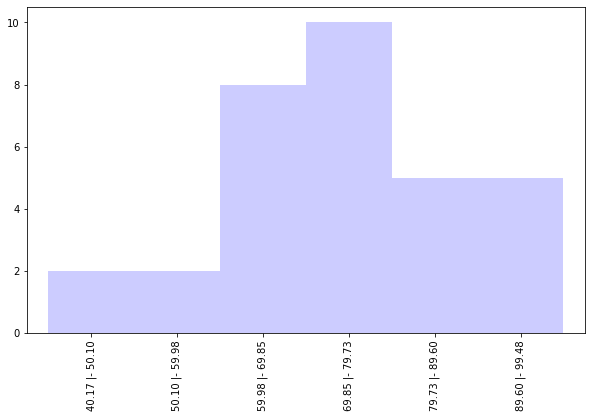

In [35]:
ax = df_freq_prct_2020['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(10, 6))
ax


In [36]:
df_ips_2020.head()

,Região,Tolerância e inclusão
0,Portuaria,40.23
1,Centro,51.84
2,Rio Comprido,68.64
3,Botafogo,99.48
4,Copacabana,98.53


## Aqui utilizaremos o parâmetro "retbins" para descobrirmos a avaliação de todas a regiões administrativas de acordo com os intervalos rotulados pelas labels e em seguida criaremos uma lista com a classificação retornada que posteriormente será adicionada ao DataFrame que classificará todas as regiões

In [37]:
avaliacao = pd.value_counts(pd.cut( x = df_ips_2020["Tolerância e inclusão"], 
            bins = intervalo_2020, retbins = True, labels = classificacao_2020, include_lowest = True))

print(avaliacao)

[40.17, 50.1, 59.98, 69.85, 79.73, 89.6, 99.48]                                                                                                                                                                                                                                   1
[Ruim, Mediano, Bom, Excelente, Excelente, Excelente, Bom, Excelente, Excelente, Muito bom, Muito bom, Muito bom, Ótimo, Ótimo, Muito bom, Ótimo, Muito bom, Muito bom, Muito bom, Ótimo, Bom, Muito bom, Ótimo, Mediano, Ruim, Bom, Muito bom, Bom, Bom, Muito bom, Bom, Bom]    1
dtype: int64


In [38]:
rating =  ["Ruim", "Mediano", "Bom", "Excelente", 
          "Excelente", "Excelente", "Bom", "Excelente", 
          "Excelente", "Muito bom", "Muito bom", "Muito bom", 
          "Ótimo", "Ótimo", "Muito bom", "Ótimo", 
          "Muito bom", "Muito bom", "Muito bom", "Ótimo", 
          "Bom", "Muito bom", "Ótimo", "Mediano",
          "Ruim", "Bom", "Muito bom", "Bom",
          "Bom", "Muito bom", "Bom", "Bom"]

rating = pd.DataFrame(rating)

rating.head() 

,0
0,Ruim
1,Mediano
2,Bom
3,Excelente
4,Excelente


In [39]:
df_ips_2020["Classificação"] = rating

df_ips_2020

,Região,Tolerância e inclusão,Classificação
0,Portuaria,40.23,Ruim
1,Centro,51.84,Mediano
2,Rio Comprido,68.64,Bom
3,Botafogo,99.48,Excelente
4,Copacabana,98.53,Excelente
5,Lagoa,98.57,Excelente
6,São Cristovão,62.40,Bom
7,Tijuca,95.88,Excelente
8,Vila Isabel,92.14,Excelente
9,Ramos,76.76,Muito bom


# Rankeando do maior para o menor e resetando o Index

In [40]:
df_ips_2020 = df_ips_2020.sort_values(by=["Tolerância e inclusão"], ascending = False)
df_ips_2020 = df_ips_2020.reset_index()
df_ips_2020

,index,Região,Tolerância e inclusão,Classificação
0,3,Botafogo,99.48,Excelente
1,5,Lagoa,98.57,Excelente
2,4,Copacabana,98.53,Excelente
3,7,Tijuca,95.88,Excelente
4,8,Vila Isabel,92.14,Excelente
5,12,Méier,84.63,Ótimo
6,13,Iraja,84.04,Ótimo
7,19,Ilha Do Governador,83.26,Ótimo
8,22,Barra Da Tijuca,82.94,Ótimo
9,15,Jacarepaguá,79.79,Ótimo


In [41]:
df_ips_2020 = df_ips_2020.drop(columns=["index"])


In [42]:
df_ips_2020.index = df_ips_2020.index + 1
df_ips_2020

,Região,Tolerância e inclusão,Classificação
1,Botafogo,99.48,Excelente
2,Lagoa,98.57,Excelente
3,Copacabana,98.53,Excelente
4,Tijuca,95.88,Excelente
5,Vila Isabel,92.14,Excelente
6,Méier,84.63,Ótimo
7,Iraja,84.04,Ótimo
8,Ilha Do Governador,83.26,Ótimo
9,Barra Da Tijuca,82.94,Ótimo
10,Jacarepaguá,79.79,Ótimo


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tolerância e inclusão', ylabel='Density'>

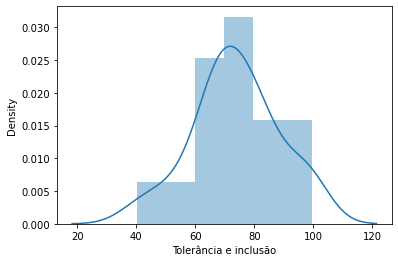

In [43]:
ax = sns.distplot(df_ips_2020["Tolerância e inclusão"])

ax

<AxesSubplot:ylabel='Frequency'>

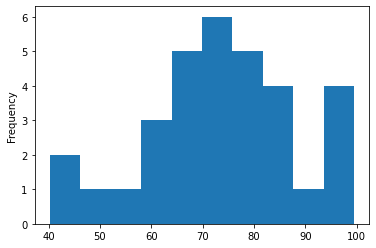

In [44]:
df_ips_2020["Tolerância e inclusão"].plot(kind="hist")

In [45]:
df_ips_2020["Tolerância e inclusão"].describe()

count    32.000000
mean     73.653125
std      14.621055
min      40.230000
25%      67.160000
50%      71.160000
75%      83.020000
max      99.480000
Name: Tolerância e inclusão, dtype: float64

In [46]:
df_ips_2020["Tolerância e inclusão"].median()

71.16

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tolerância e inclusão'>

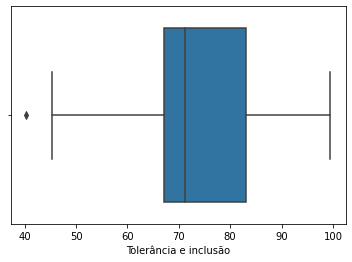

In [47]:
bx = sns.boxplot(df_ips_2020["Tolerância e inclusão"])
bx

# Visualização

## Ranking de tolerância e inclusão por região administrativa da cidade do Rio de Janeiro do ano de 2020

In [48]:
df_ips_2020

,Região,Tolerância e inclusão,Classificação
1,Botafogo,99.48,Excelente
2,Lagoa,98.57,Excelente
3,Copacabana,98.53,Excelente
4,Tijuca,95.88,Excelente
5,Vila Isabel,92.14,Excelente
6,Méier,84.63,Ótimo
7,Iraja,84.04,Ótimo
8,Ilha Do Governador,83.26,Ótimo
9,Barra Da Tijuca,82.94,Ótimo
10,Jacarepaguá,79.79,Ótimo


In [49]:
df_ips_2020.describe()

,Tolerância e inclusão
count,32.000000
mean,73.653125
std,14.621055
min,40.230000
25%,67.160000
50%,71.160000
75%,83.020000
max,99.480000


## Histograma

<AxesSubplot:ylabel='Frequency'>

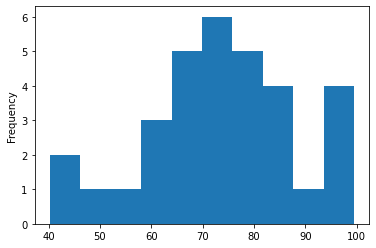

In [50]:
df_ips_2020["Tolerância e inclusão"].plot(kind="hist")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tolerância e inclusão', ylabel='Density'>

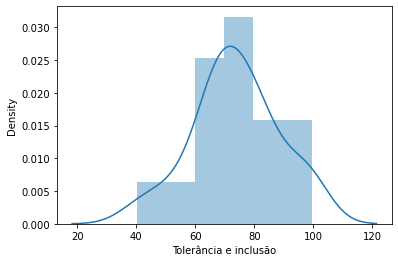

In [51]:
ax = sns.distplot(df_ips_2020["Tolerância e inclusão"])

ax

## Boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tolerância e inclusão'>

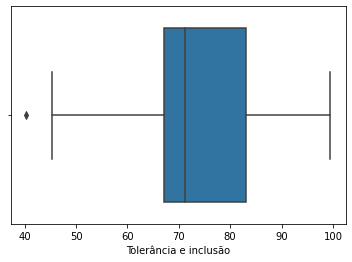

In [52]:
bx = sns.boxplot(df_ips_2020["Tolerância e inclusão"])
bx

## Tabela de frequências

In [53]:
df_freq_prct_2020

,Classificação,Frequência,Porcentagem %
40.17 |- 50.10,Ruim,2,6.250
50.10 |- 59.98,Mediano,2,6.250
59.98 |- 69.85,Bom,8,25.000
69.85 |- 79.73,Muito bom,10,31.250
79.73 |- 89.60,Ótimo,5,15.625
89.60 |- 99.48,Excelente,5,15.625


<AxesSubplot:>

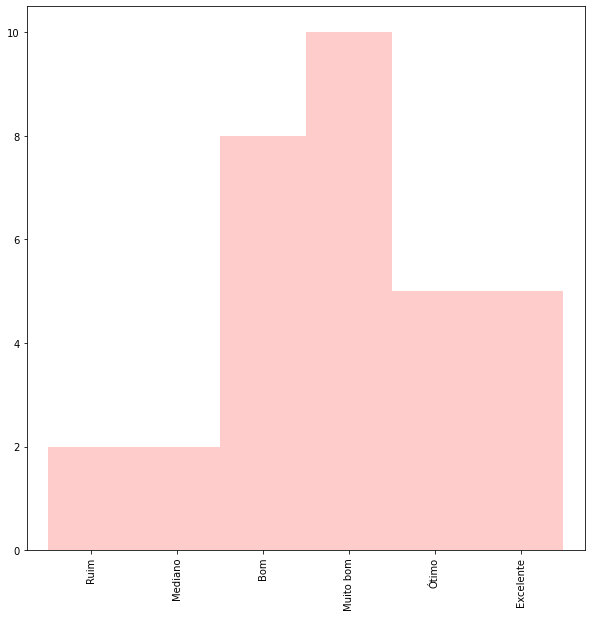

In [54]:
ax = df_freq_prct_2020["Frequência"].plot.bar(width = 1, color = 'red', alpha = 0.2, figsize=(10, 10))
ax.set_xticklabels(df_freq_prct_2020["Classificação"])
ax

# Verificando a correlação

In [58]:
df_ips_rj.head()

,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
0,2016,Rio De Janeiro,60.77,75.84,70.19,83.68,78.16,71.34,53.28,49.96,50.89,62.03,50.26,53.20,61.46,54.82,64.14,32.36
1,2016,Portuaria,45.33,59.10,87.63,80.80,67.97,0.00,41.67,41.34,20.73,64.74,39.89,35.23,39.35,61.94,34.18,5.43
2,2016,Centro,57.75,62.43,59.38,74.18,91.85,24.31,52.41,55.60,56.00,41.04,56.99,58.42,45.89,87.27,52.24,48.26
3,2016,Rio Comprido,52.43,58.97,61.22,84.36,64.78,25.52,47.19,34.00,42.08,47.84,64.84,51.14,66.89,50.45,64.74,22.48
4,2016,Botafogo,87.12,93.32,85.15,98.49,99.55,90.08,81.13,78.47,86.52,81.46,78.07,86.91,68.19,85.74,94.30,99.39


In [59]:
df_correl = df_ips_rj.query("ano == 2020")
df_correl.head()

,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
66,2020,Rio De Janeiro,60.79,74.13,66.12,83.68,79.57,67.14,51.63,66.19,50.89,53.08,36.37,56.62,54.33,62.72,77.05,32.36
67,2020,Portuaria,42.06,59.67,64.32,80.80,71.06,22.49,36.00,59.51,20.73,19.20,44.55,30.52,25.66,50.76,40.23,5.43
68,2020,Centro,55.59,59.23,56.64,74.18,91.60,14.52,50.26,61.97,56.00,37.26,45.82,57.26,41.68,87.28,51.84,48.26
69,2020,Rio Comprido,55.50,68.27,72.61,84.36,73.29,42.82,50.81,68.72,42.08,39.33,53.10,47.42,37.76,60.82,68.64,22.48
70,2020,Botafogo,85.03,91.66,89.92,98.49,99.07,79.18,77.09,80.70,86.52,78.58,62.56,86.32,56.63,89.80,99.48,99.39


In [60]:
df_correl = df_correl.drop(66)
df_correl.head()

,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
67,2020,Portuaria,42.06,59.67,64.32,80.80,71.06,22.49,36.00,59.51,20.73,19.20,44.55,30.52,25.66,50.76,40.23,5.43
68,2020,Centro,55.59,59.23,56.64,74.18,91.60,14.52,50.26,61.97,56.00,37.26,45.82,57.26,41.68,87.28,51.84,48.26
69,2020,Rio Comprido,55.50,68.27,72.61,84.36,73.29,42.82,50.81,68.72,42.08,39.33,53.10,47.42,37.76,60.82,68.64,22.48
70,2020,Botafogo,85.03,91.66,89.92,98.49,99.07,79.18,77.09,80.70,86.52,78.58,62.56,86.32,56.63,89.80,99.48,99.39
71,2020,Copacabana,80.23,92.03,92.01,99.32,96.84,79.97,68.93,77.01,81.95,72.40,44.36,79.73,56.72,80.14,98.53,83.53


In [61]:
df_correl = df_correl.reset_index()
df_correl.head()

,index,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
0,67,2020,Portuaria,42.06,59.67,64.32,80.80,71.06,22.49,36.00,59.51,20.73,19.20,44.55,30.52,25.66,50.76,40.23,5.43
1,68,2020,Centro,55.59,59.23,56.64,74.18,91.60,14.52,50.26,61.97,56.00,37.26,45.82,57.26,41.68,87.28,51.84,48.26
2,69,2020,Rio Comprido,55.50,68.27,72.61,84.36,73.29,42.82,50.81,68.72,42.08,39.33,53.10,47.42,37.76,60.82,68.64,22.48
3,70,2020,Botafogo,85.03,91.66,89.92,98.49,99.07,79.18,77.09,80.70,86.52,78.58,62.56,86.32,56.63,89.80,99.48,99.39
4,71,2020,Copacabana,80.23,92.03,92.01,99.32,96.84,79.97,68.93,77.01,81.95,72.40,44.36,79.73,56.72,80.14,98.53,83.53


In [441]:
df_correl = df_correl.drop(0)

In [62]:
df_correl = df_correl.drop(columns=['index', "ano", "ips_geral", "necessidades_humanas_basicas_nota_dimensao",
"fundamentos_bem_estar_nota_dimensao", "oportunidades_nota_dimensao"])
df_correl

,regiao_administrativa,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
0,Portuaria,64.32,80.80,71.06,22.49,59.51,20.73,19.20,44.55,25.66,50.76,40.23,5.43
1,Centro,56.64,74.18,91.60,14.52,61.97,56.00,37.26,45.82,41.68,87.28,51.84,48.26
2,Rio Comprido,72.61,84.36,73.29,42.82,68.72,42.08,39.33,53.10,37.76,60.82,68.64,22.48
3,Botafogo,89.92,98.49,99.07,79.18,80.70,86.52,78.58,62.56,56.63,89.80,99.48,99.39
4,Copacabana,92.01,99.32,96.84,79.97,77.01,81.95,72.40,44.36,56.72,80.14,98.53,83.53
5,Lagoa,67.40,98.86,96.28,77.66,69.58,89.06,75.07,47.23,50.12,96.77,98.57,81.59
6,São Cristovão,65.35,86.36,74.47,50.36,66.57,34.65,31.01,30.98,50.37,52.92,62.40,16.83
7,Tijuca,85.23,84.62,95.54,76.49,58.84,80.32,18.84,47.48,51.76,85.53,95.88,78.82
8,Vila Isabel,68.21,94.21,87.11,81.17,62.50,74.99,65.02,55.58,57.34,65.11,92.14,73.20
9,Ramos,64.90,94.92,70.96,59.99,51.91,52.42,40.99,37.20,57.34,52.68,76.76,24.39


<AxesSubplot:>

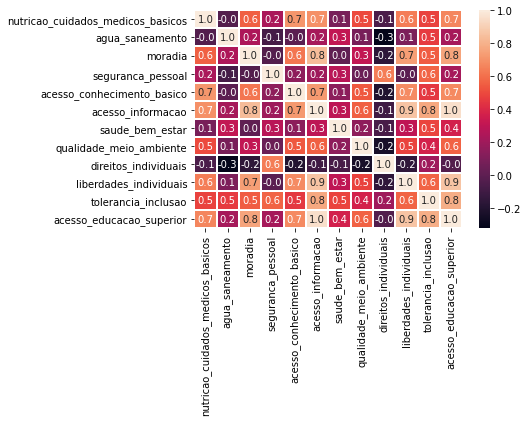

In [63]:
correlation = df_correl.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=1)
plot

In [444]:
# ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
# ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
# ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
# ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
# ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.